# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [4]:
print("Мы фиксируем сиды в домашках, чтобы результат был воспроизводим при перезапуске ноута")

Мы фиксируем сиды в домашках, чтобы результат был воспроизводим при перезапуске ноута


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [5]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [6]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [7]:
df_train.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


In [8]:
df_train.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
6998,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [9]:
df_train.describe()

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [10]:
df_train.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [11]:
df_test.describe()

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [12]:
df_test.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [13]:
df_train.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [14]:
df_train = df_train.drop_duplicates(subset=['name','year','fuel','seller_type','km_driven','owner','mileage','engine','max_power','torque'],keep='first')

In [15]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [16]:
df_train = df_train.reset_index(drop=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [17]:
df_train[['torque', 'max_torque_rpm']] = df_train['torque'].str.extract('(\d+\.\d+)Nm@ (\d+)rpm').astype(float)

In [18]:
df_test[['torque', 'max_torque_rpm']] = df_test['torque'].str.extract('(\d+\.\d+)Nm@ (\d+)rpm').astype(float)

In [19]:
split_mileage = df_train['mileage'].str.split(' ', n=1, expand=True)
df_train['mileage'] = pd.to_numeric(split_mileage[0], errors='coerce').astype(float)

split_engine = df_train['engine'].str.split(' ', n=1, expand=True)
df_train['engine'] = pd.to_numeric(split_engine[0], errors='coerce').astype(float)

split_max_power = df_train['max_power'].str.split(' ', n=1, expand=True)
df_train['max_power'] = pd.to_numeric(split_max_power[0], errors='coerce').astype(float)

In [20]:
split_mileage = df_test['mileage'].str.split(' ', n=1, expand=True)
df_test['mileage'] = pd.to_numeric(split_mileage[0], errors='coerce').astype(float)

split_engine = df_test['engine'].str.split(' ', n=1, expand=True)
df_test['engine'] = pd.to_numeric(split_engine[0], errors='coerce').astype(float)

split_max_power = df_test['max_power'].str.split(' ', n=1, expand=True)
df_test['max_power'] = pd.to_numeric(split_max_power[0], errors='coerce').astype(float)

In [21]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1000 non-null   object 
 1   year            1000 non-null   int64  
 2   selling_price   1000 non-null   int64  
 3   km_driven       1000 non-null   int64  
 4   fuel            1000 non-null   object 
 5   seller_type     1000 non-null   object 
 6   transmission    1000 non-null   object 
 7   owner           1000 non-null   object 
 8   mileage         981 non-null    float64
 9   engine          981 non-null    float64
 10  max_power       981 non-null    float64
 11  torque          85 non-null     float64
 12  seats           981 non-null    float64
 13  max_torque_rpm  85 non-null     float64
dtypes: float64(6), int64(3), object(5)
memory usage: 109.5+ KB


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [22]:
cat_features_mask = (df_train.dtypes == "object").values

In [23]:
from sklearn import impute

In [24]:
# для вещественнозначных признаков заполним пропуски средними
df_real_train = df_train[df_train.columns[~cat_features_mask]]
mis_replacer = impute.SimpleImputer(strategy="mean")
df_no_mis_real_train = pd.DataFrame(data=mis_replacer.fit_transform(df_real_train), columns=df_real_train.columns)

# для категориальных - пустыми строками
df_cat_train = df_train[df_train.columns[cat_features_mask]].fillna("")
df_cat_train.reset_index(drop=True, inplace=True)

df_no_mis_train = pd.concat([df_cat_train,df_no_mis_real_train], axis=1)

In [25]:
# для вещественнозначных признаков заполним пропуски средними
df_real_test = df_test[df_test.columns[~cat_features_mask]]
mis_replacer = impute.SimpleImputer(strategy="mean")
df_no_mis_real_test = pd.DataFrame(data=mis_replacer.fit_transform(df_real_test), columns=df_real_test.columns)

# для категориальных - пустыми строками
df_cat_test = df_test[df_test.columns[cat_features_mask]].fillna("")
df_cat_test.reset_index(drop=True, inplace=True)

df_no_mis_test = pd.concat([df_cat_test,df_no_mis_real_test], axis=1)


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [26]:
print("Мы не можем работать с количеством мест как с числами, прямое сравнение не даст результата, аналогия с улицами из лекции")

Мы не можем работать с количеством мест как с числами, прямое сравнение не даст результата, аналогия с улицами из лекции


In [27]:
df_no_mis_train['engine'] = df_no_mis_train['engine'].astype(int)
df_no_mis_train['seats'] = df_no_mis_train['seats'].astype(int)

In [28]:
df_no_mis_test['engine'] = df_no_mis_test['engine'].astype(int)
df_no_mis_test['seats'] = df_no_mis_test['seats'].astype(int)

In [29]:
df_no_mis_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1000 non-null   object 
 1   fuel            1000 non-null   object 
 2   seller_type     1000 non-null   object 
 3   transmission    1000 non-null   object 
 4   owner           1000 non-null   object 
 5   year            1000 non-null   float64
 6   selling_price   1000 non-null   float64
 7   km_driven       1000 non-null   float64
 8   mileage         1000 non-null   float64
 9   engine          1000 non-null   int64  
 10  max_power       1000 non-null   float64
 11  torque          1000 non-null   float64
 12  seats           1000 non-null   int64  
 13  max_torque_rpm  1000 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 109.5+ KB


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

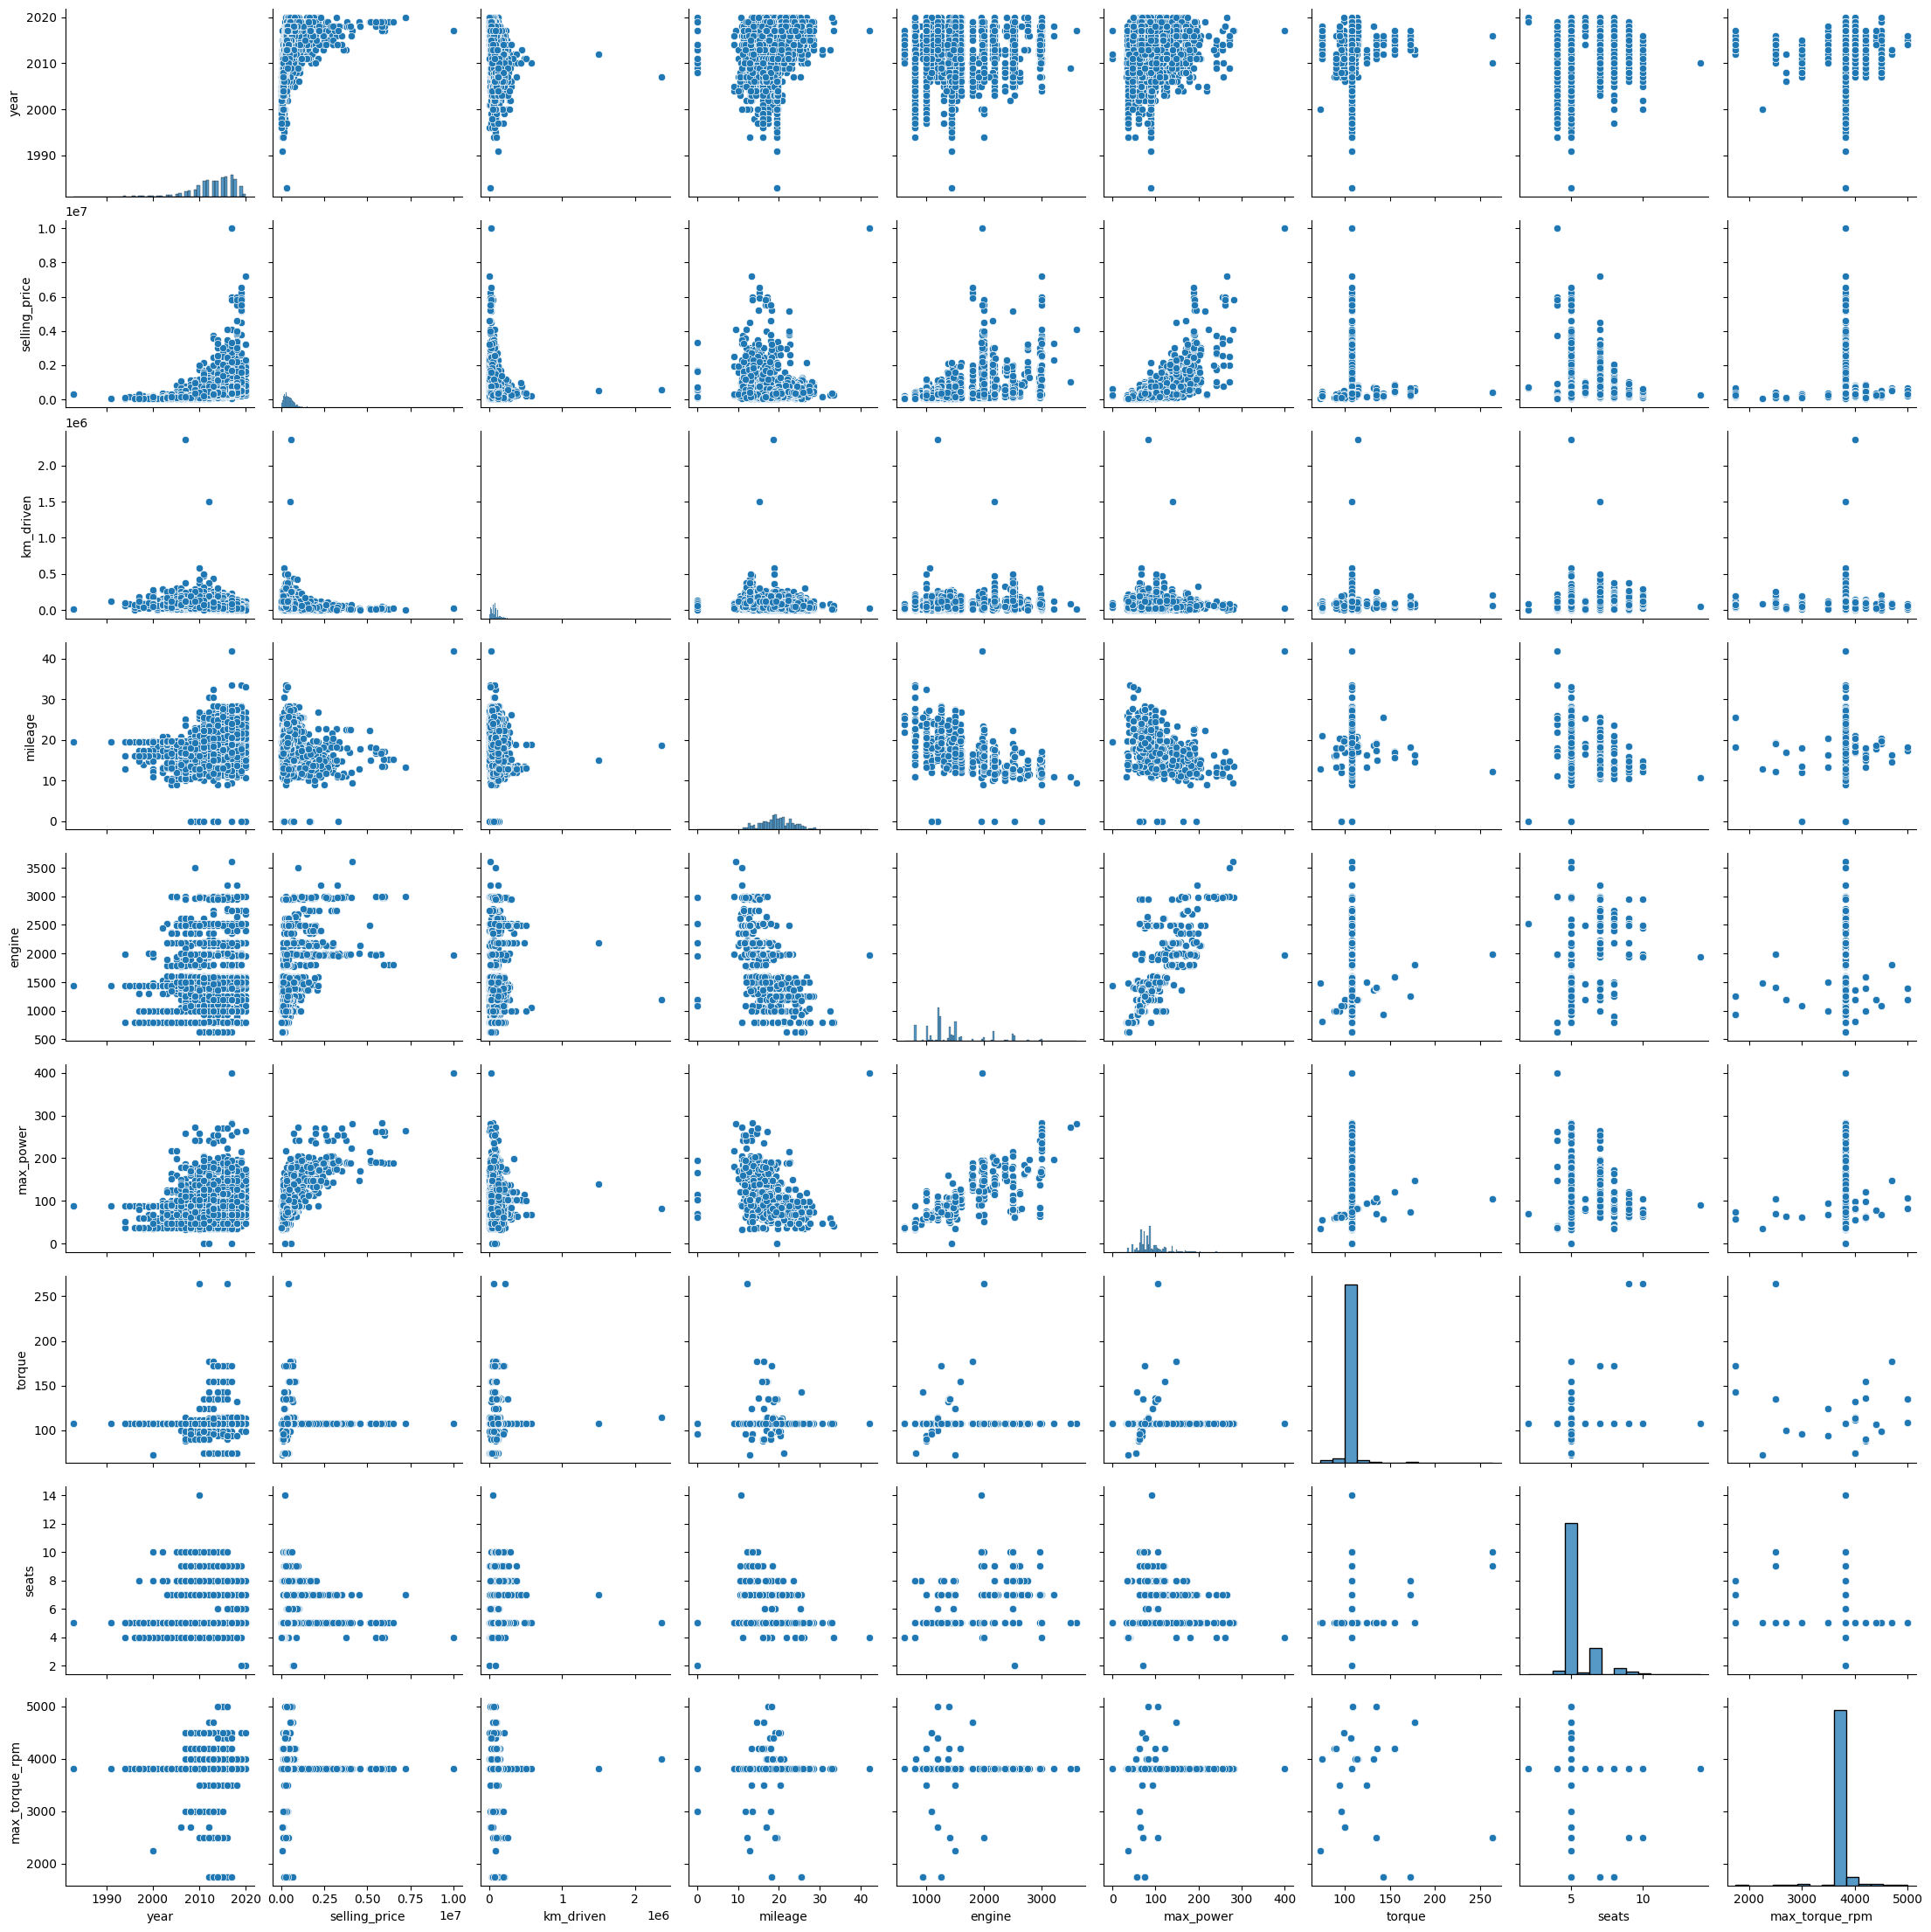

In [30]:
sns.pairplot(df_no_mis_train.select_dtypes(include=['float64', 'int64']))

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

Данные подтверждают логичные связи предикторов с целевой переменной,например, что более мощные машины стоят дороже или корреляцию признаков, например, что чем старше машина тем она дороже

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

Совокупности при разделении на трейн и тест - похожи

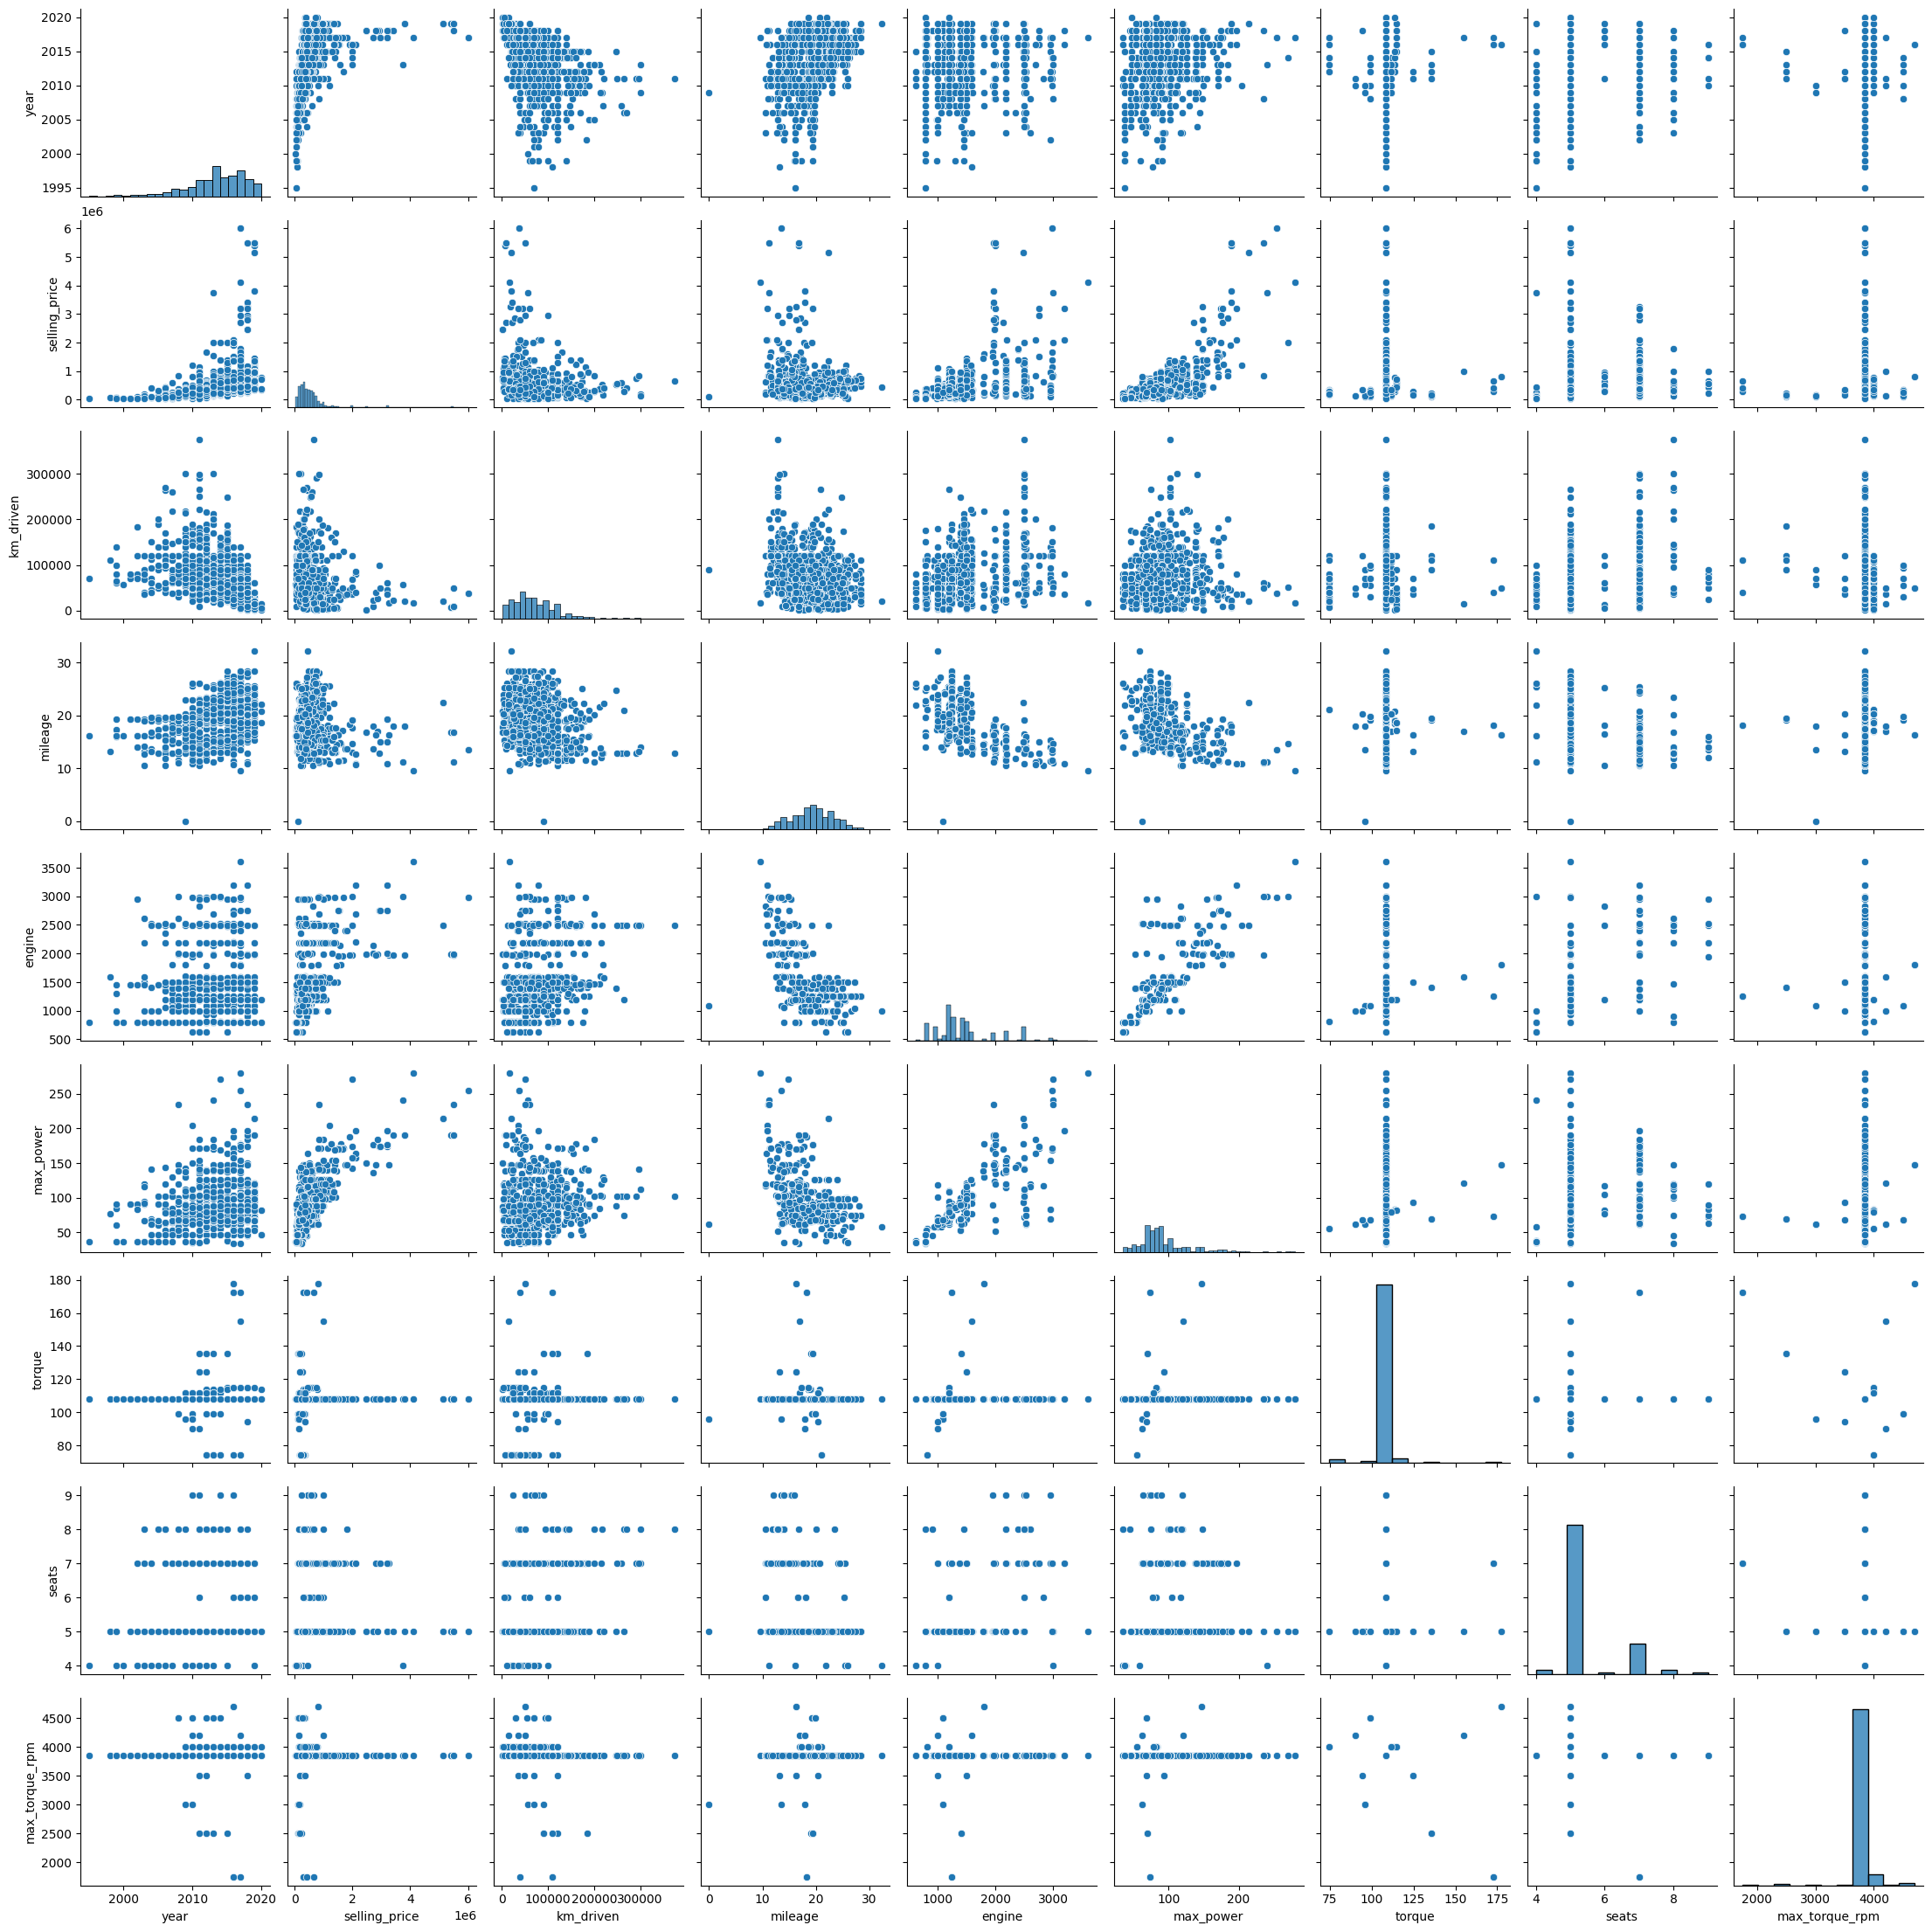

In [31]:
sns.pairplot(df_no_mis_test.select_dtypes(include=['float64', 'int64']))

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

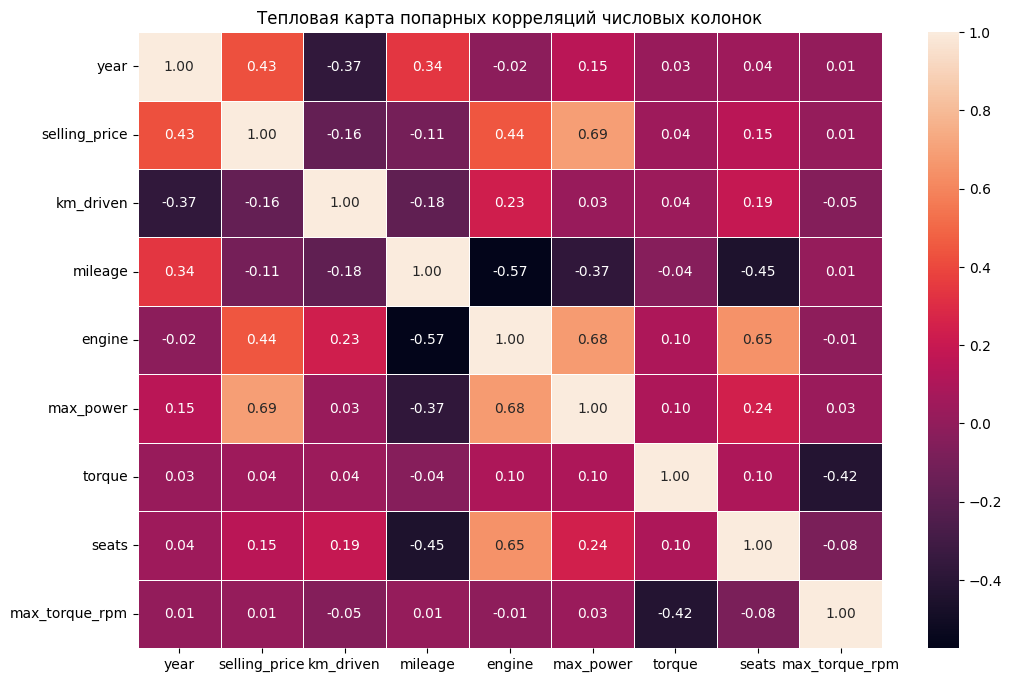

In [32]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_no_mis_train.select_dtypes(include=['float64', 'int64']).corr(), annot=True, fmt='.2f', linewidths=.5)
plt.title('Тепловая карта попарных корреляций числовых колонок')
plt.show()


Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

* Наименее скоррелированы между собой тип двигателя и год
* Сильная положительная корреляция наблюдается между мощностью двигателя и ценой, что тоже логично, посокльку в более дорогие машины ставят более мощные двигатели
* Да, так можно утверждать

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

In [33]:
df_no_mis_train.select_dtypes(include=['float64', 'int64']).corr().abs().unstack().sort_values(ascending=False).drop_duplicates().idxmax()


('year', 'year')

Text(0.5, 1.0, 'Диаграмма рассеяния max_power от selling_price')

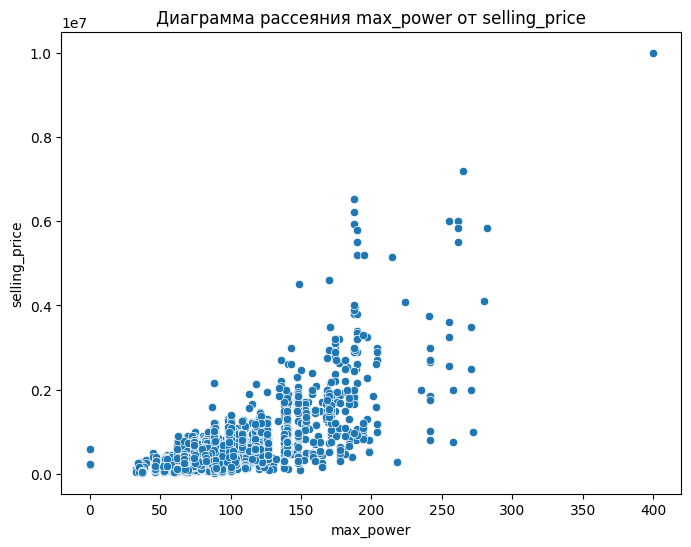

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='max_power', y='selling_price', data=df_no_mis_train)
plt.title('Диаграмма рассеяния max_power от selling_price')

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

Интуитивно кажется, что один из главных факторов цены - год выпуска, это согласуется с данными

Text(0.5, 1.0, 'Диаграмма рассеяния year от selling_price')

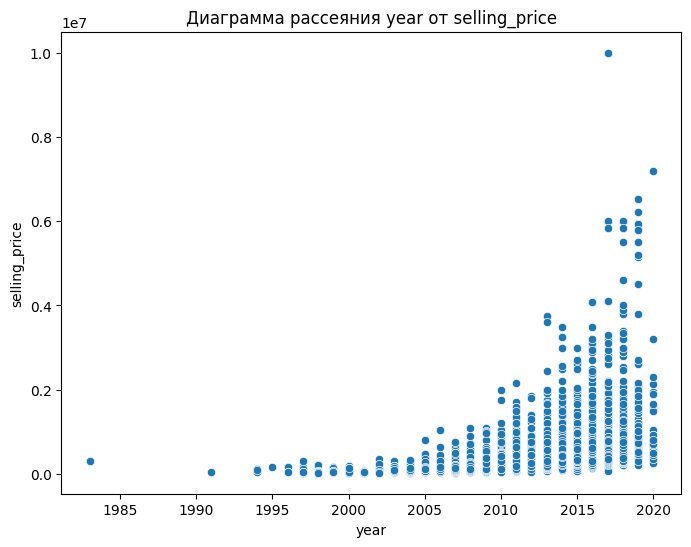

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='year', y='selling_price', data=df_no_mis_train)
plt.title('Диаграмма рассеяния year от selling_price')

Важный момент при выборе машины - связь двигателя и расхода

Text(0.5, 1.0, 'Диаграмма рассеяния engine от mileage')

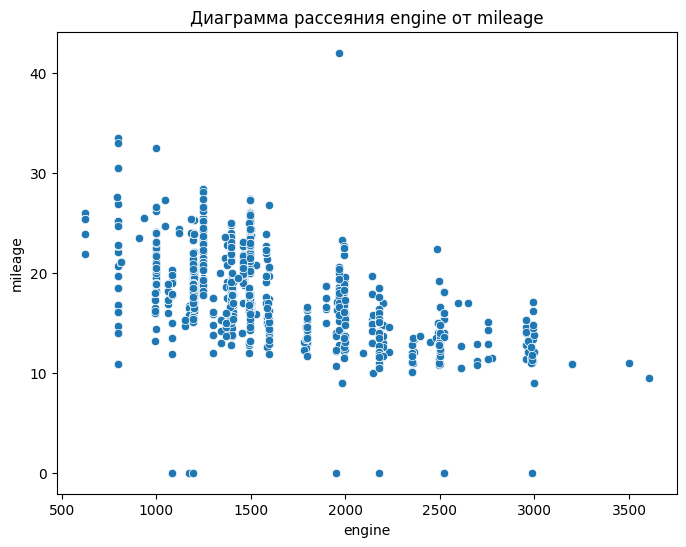

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='engine', y='mileage', data=df_no_mis_train)
plt.title('Диаграмма рассеяния engine от mileage')

Text(0.5, 1.0, 'Диаграмма рассеяния mileage от selling_price')

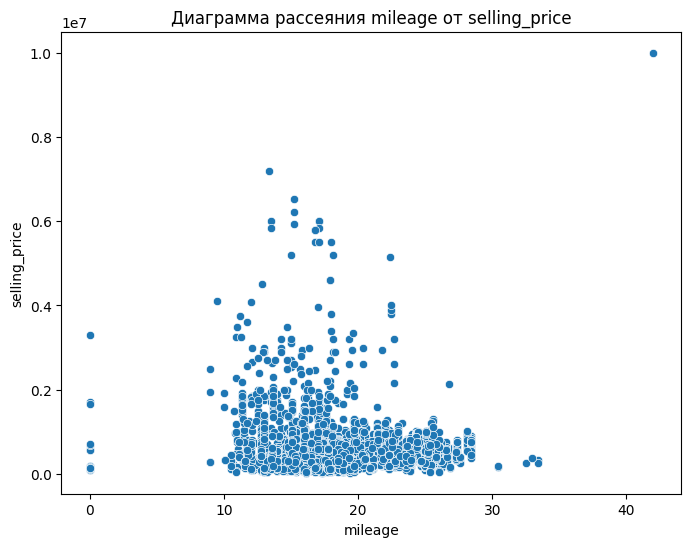

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='mileage', y='selling_price', data=df_no_mis_train)
plt.title('Диаграмма рассеяния mileage от selling_price')

Так же связь расхода и цены подтверждается данными 

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [51]:
y_train = df_no_mis_train['selling_price']
X_train = df_no_mis_train.drop(['selling_price', 'name','fuel', 'seller_type', 'transmission', 'owner', 'torque','engine'], axis=1)

In [52]:
assert X_train.shape == (5840, 6)

In [53]:
y_test = df_no_mis_test['selling_price']
X_test = df_no_mis_test.drop(['selling_price', 'name', 'fuel', 'seller_type', 'transmission', 'owner', 'torque','engine'], axis=1)

In [54]:
assert X_test.shape == (1000, 6)

In [55]:
X_test

,year,km_driven,mileage,max_power,seats,max_torque_rpm
0,2010.0,168000.0,14.00,112.00,7,3844.117647
1,2017.0,25000.0,21.50,108.50,5,3844.117647
2,2007.0,218463.0,12.90,130.00,5,3844.117647
3,2015.0,173000.0,25.10,98.60,5,3844.117647
4,2011.0,70000.0,16.50,65.00,5,3844.117647
...,...,...,...,...,...,...
995,2008.0,100000.0,19.81,68.05,5,4500.000000
996,2017.0,50000.0,18.60,81.83,5,4000.000000
997,2009.0,40000.0,23.00,90.00,5,3844.117647
998,2012.0,25000.0,20.36,78.90,5,4000.000000


(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

$R^2$ для теста

In [57]:
r2_score(y_test, model.predict(X_test))

0.590981207300902

$R^2$ для трейна

In [58]:
r2_score(y_train, model.predict(X_train))

0.588947113116139

$MSE$ для теста

In [59]:
MSE(y_test, model.predict(X_test))

235115681836.20282

$MSE$ для трейна

In [60]:
MSE(y_train, model.predict(X_train))

117823516473.60222

Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_train = MSE(y_train, y_pred_train)
mse_test = MSE(y_test, y_pred_test)

print(f'R^2 на тренировочных данных: {r2_train:.4f}')
print(f'R^2 на тестовых данных: {r2_test:.4f}')
print(f'MSE на тренировочных данных: {mse_train:.4f}')
print(f'MSE на тестовых данных: {mse_test:.4f}')


R^2 на тренировочных данных: 0.5889
R^2 на тестовых данных: 0.5614
MSE на тренировочных данных: 117823516473.6027
MSE на тестовых данных: 252114933533.4988


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [62]:
print (X_train.columns, model.coef_)

Index(['year', 'km_driven', 'mileage', 'max_power', 'seats', 'max_torque_rpm'], dtype='object') [157267.80594762 -37381.13182998  16569.28503548 352889.48461476
   2591.08272714  -7196.26512202]


Самый большой вес имеет признак max_power

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [63]:
from sklearn.linear_model import Lasso 

model_l1 = Lasso(alpha=2)

model_l1.fit(X_train_scaled, y_train)

pred_l1 = model_l1.predict(X_test_scaled)

r2_score(y_test, pred_l1)


0.561407065840914

In [64]:
MSE(y_test, pred_l1)

252115742855.89474

<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [65]:
print (model_l1.coef_)

[157269.06558325 -37378.66315524  16564.31976498 352886.24741679
   2587.261781    -7194.30893746]


Веса у меньшились, но не изменились, видимо из-за неправильно подбранного гиперпараметра

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [66]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 1000000]}

grid_search = GridSearchCV(Lasso(), param_grid, cv=10)

grid_search.fit(X_train_scaled, y_train)

print(grid_search.best_params_)

y_pred_l1 = grid_search.predict(X_test_scaled)

r2_score(y_test, y_pred_l1)

{'alpha': 10000}


0.5512858221541559

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [67]:
from sklearn.linear_model import Lasso 

model_l1 = Lasso(alpha=10000)

model_l1.fit(X_train_scaled, y_train)

pred_l1 = model_l1.predict(X_test_scaled)

r2_score(y_test, pred_l1)


0.5512858221541559

In [68]:
print (model_l1.coef_)

[158375.57665555 -28626.71711551    539.36684427 336898.02111688
     -0.             -0.        ]


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [69]:
from sklearn.linear_model import ElasticNet

alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
l1_ratios = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9]

for alpha in alphas:
    for l1_ratio in l1_ratios:
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        r2 = r2_score(y_test, y_pred)
        print(f"Модель с alpha={alpha}, l1_ratio={l1_ratio}: R^2 = {r2:.4f}")

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.160e+14, tolerance: 1.674e+11
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.450e+12, tolerance: 1.674e+11
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.926e+11, toleranc

Модель с alpha=1e-05, l1_ratio=1e-05: R^2 = 0.5614
Модель с alpha=1e-05, l1_ratio=0.0001: R^2 = 0.5614
Модель с alpha=1e-05, l1_ratio=0.001: R^2 = 0.5614
Модель с alpha=1e-05, l1_ratio=0.01: R^2 = 0.5614
Модель с alpha=1e-05, l1_ratio=0.1: R^2 = 0.5614
Модель с alpha=1e-05, l1_ratio=0.3: R^2 = 0.5614
Модель с alpha=1e-05, l1_ratio=0.5: R^2 = 0.5614
Модель с alpha=1e-05, l1_ratio=0.7: R^2 = 0.5614
Модель с alpha=1e-05, l1_ratio=0.9: R^2 = 0.5614
Модель с alpha=0.0001, l1_ratio=1e-05: R^2 = 0.5614
Модель с alpha=0.0001, l1_ratio=0.0001: R^2 = 0.5614
Модель с alpha=0.0001, l1_ratio=0.001: R^2 = 0.5614
Модель с alpha=0.0001, l1_ratio=0.01: R^2 = 0.5614
Модель с alpha=0.0001, l1_ratio=0.1: R^2 = 0.5614
Модель с alpha=0.0001, l1_ratio=0.3: R^2 = 0.5614
Модель с alpha=0.0001, l1_ratio=0.5: R^2 = 0.5614
Модель с alpha=0.0001, l1_ratio=0.7: R^2 = 0.5614
Модель с alpha=0.0001, l1_ratio=0.9: R^2 = 0.5614
Модель с alpha=0.001, l1_ratio=1e-05: R^2 = 0.5612
Модель с alpha=0.001, l1_ratio=0.0001: R^2

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.995e+13, tolerance: 1.674e+11
  model = cd_fast.enet_coordinate_descent(


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

alpha=0.0001, l1_ratio=0.9

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [70]:
X_train_cat = df_train.drop(['selling_price', 'name'], axis=1)

In [71]:
X_test_cat = df_test.drop(['selling_price', 'name'], axis=1)

In [72]:
assert X_train_cat.shape == (5840, 10)

AssertionError: 

In [73]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [74]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
import pandas as pd

df_train_encoded = pd.get_dummies(X_train_cat, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)

seats_encoded = pd.get_dummies(X_train_cat['seats'], prefix='seats', drop_first=True)

df_train_encoded = pd.concat([df_train_encoded, seats_encoded], axis=1).drop(['seats_10.0','seats_14.0','seats_4.0'], axis=1)

df_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          5840 non-null   int64  
 1   km_driven                     5840 non-null   int64  
 2   mileage                       5654 non-null   float64
 3   engine                        5654 non-null   float64
 4   max_power                     5656 non-null   float64
 5   torque                        501 non-null    float64
 6   seats                         5654 non-null   float64
 7   max_torque_rpm                501 non-null    float64
 8   fuel_Diesel                   5840 non-null   bool   
 9   fuel_LPG                      5840 non-null   bool   
 10  fuel_Petrol                   5840 non-null   bool   
 11  seller_type_Individual        5840 non-null   bool   
 12  seller_type_Trustmark Dealer  5840 non-null   bool   
 13  tra

In [75]:
df_test_encoded = pd.get_dummies(X_test_cat, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)

seats_encoded = pd.get_dummies(X_test_cat['seats'], prefix='seats', drop_first=True)

df_test_encoded = pd.concat([df_test_encoded, seats_encoded], axis=1)

df_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          1000 non-null   int64  
 1   km_driven                     1000 non-null   int64  
 2   mileage                       981 non-null    float64
 3   engine                        981 non-null    float64
 4   max_power                     981 non-null    float64
 5   torque                        85 non-null     float64
 6   seats                         981 non-null    float64
 7   max_torque_rpm                85 non-null     float64
 8   fuel_Diesel                   1000 non-null   bool   
 9   fuel_LPG                      1000 non-null   bool   
 10  fuel_Petrol                   1000 non-null   bool   
 11  seller_type_Individual        1000 non-null   bool   
 12  seller_type_Trustmark Dealer  1000 non-null   bool   
 13  tran

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [76]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

X_train_imputed = imputer.fit_transform(df_train_encoded)
X_test_imputed = imputer.transform(df_test_encoded)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.fit_transform(X_test_imputed)

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_ridge = GridSearchCV(Ridge(), param_grid, scoring='r2', cv=10)
grid_search_ridge.fit(X_train_scaled, y_train)

print(grid_search_ridge.best_params_)

y_pred_ridge = grid_search_ridge.predict(X_test_scaled)
r2_score(y_test, y_pred_ridge)

{'alpha': 100}


0.5919308114148081

Качество предстказаний незначительно увеличилось

# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [77]:
# your code here

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [78]:
def business_metrics(y_true, y_pred):
    percentage_difference = np.abs(y_pred - y_true) / y_true * 100
    custom_metric = np.mean(percentage_difference <= 10)
    
    return custom_metric

model_l1 = Ridge(alpha=100)

model_l1.fit(X_train_scaled, y_train)

pred_l1 = model_l1.predict(X_test_scaled)

business_metrics(y_test,pred_l1)

0.228

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link